> 

# Project: Medical Appointment No Shows

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> ****: This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.
>
> We will make our Exploratory Data Analysis to get data insights and see what to discover from that data set.

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> ****: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df=pd.read_csv("noshowapp.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.shape

(110527, 14)

there are "110527" rows and "14" columns

In [4]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


=======================================================================================================

so as discovered from this cell  
1- there is no null values  
2-  i have some columns that must change to date time format "ScheduledDay,AppointmentDay"  
    And the "Gender" from string to Category {M: "Male" , F: "Female"}  
    And "No-show" from string to Integer {1: "Yes" , 0: "No"}
    

the columns of "PatientId" and "AppointmentID" are Not so important in our analysis so i don't see if i deleted them there is no problems



### Data Cleaning 

- After discussing the structure of the data and any problems that need to be
- cleaned, perform those cleaning steps in the second part of this section.

In [6]:
df.drop(["PatientId","AppointmentID"],axis=1, inplace=True)

In [7]:
df.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


- if we noticed that we will find that the "Age" column has some unreal values from the "min" and "max" value from the discription table  
- and also i see that there is no real value of age with zero value so i will delete all ages with zero

In [8]:
df = df[(df["Age"] >0) & (df["Age"] <=110)]
df.shape

(106982, 12)

In [9]:
df.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,106982.000000,106982.000000,106982.000000,106982.000000,106982.000000,106982.000000,106982.000000
mean,38.312501,0.101036,0.203773,0.074246,0.031407,0.022938,0.323269
std,22.460622,0.301377,0.402804,0.262172,0.174416,0.164010,0.467727
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,102.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


- we will change the gender as category 
- And the (schedueled_day , appointment_day) to datetime 

In [10]:
df["Gender"] = df["Gender"].astype('category')
df["ScheduledDay"] = pd.to_datetime(df["ScheduledDay"])
df["AppointmentDay"] = pd.to_datetime(df["AppointmentDay"])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106982 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   Gender          106982 non-null  category           
 1   ScheduledDay    106982 non-null  datetime64[ns, UTC]
 2   AppointmentDay  106982 non-null  datetime64[ns, UTC]
 3   Age             106982 non-null  int64              
 4   Neighbourhood   106982 non-null  object             
 5   Scholarship     106982 non-null  int64              
 6   Hipertension    106982 non-null  int64              
 7   Diabetes        106982 non-null  int64              
 8   Alcoholism      106982 non-null  int64              
 9   Handcap         106982 non-null  int64              
 10  SMS_received    106982 non-null  int64              
 11  No-show         106982 non-null  object             
dtypes: category(1), datetime64[ns, UTC](2), int64(7), object(2)
memory usage

###### --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [11]:
df.rename(columns={'No-show': 'No_attend'}, inplace=True)

In [12]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_attend
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Correlation Matrix for our data set features

>  showing relation between our data set features in the correlation matrix plot

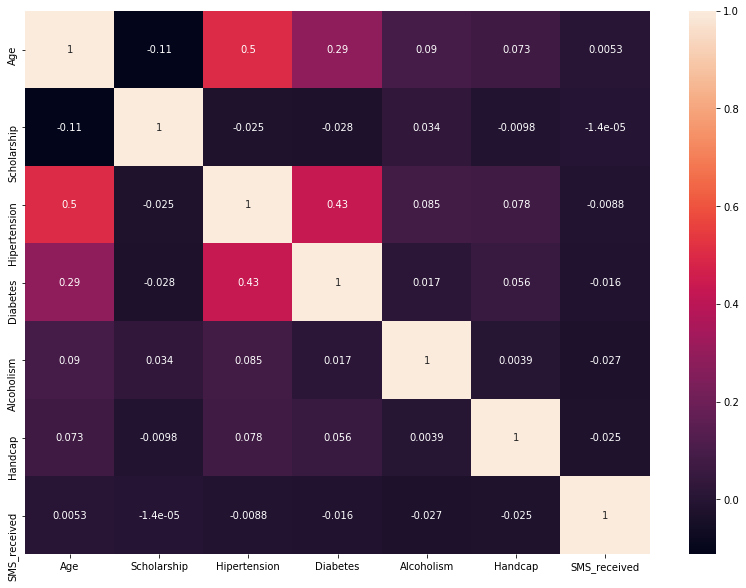

In [13]:
corrMatrix = df.corr()
plt.figure(figsize=(14,10))
sns.heatmap(corrMatrix, annot=True)

---------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------

> The closer the value in every square to 1 the closer the data points of the two features of the square , fall to a straight    line, thus, making the linear association is stronger.
> The closer the value in every square is to 0, making the linear association weaker

=====================================================================================================================

<a id='eda'></a>
## Exploratory Data Analysis

> ****: Now that we've trimmed and cleaned our data, we're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section.

### Research Question 1 : 
### Is there any relation between gender and no_show columns ?

In [13]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.


- make a group by condition to relate between gender and no_show columns data

In [14]:
gender_data = df.groupby('Gender')["No_attend"].value_counts()
gender_data

Gender  No_attend
F       No           55841
        Yes          14272
M       No           29464
        Yes           7405
Name: No_attend, dtype: int64

we will show the precent of females and males how didn't attend the appointment

In [15]:
def print_no_attend_data():
    total = len(df.index)
    female_percent = (gender_data['F']['Yes']/total) * 100
    male_percent = (gender_data['M']['Yes']/total) * 100
    print("The percent of females didn't attend the appointment --> {}%".format(female_percent.round(2)))
    print("The percent of males didn't attend the appointment ---->  {}%".format(male_percent.round(2)))
print_no_attend_data()

The percent of females didn't attend the appointment --> 13.34%
The percent of males didn't attend the appointment ---->  6.92%


we will show the precent of females and males how attended the appointment

In [16]:
def print_attend_data():
    total = len(df.index)
    female_percent = (gender_data['F']['No']/total) * 100
    male_percent = (gender_data['M']['No']/total) * 100
    print("The percent of females attended the appointment --> {}%".format(female_percent.round(2)))
    print("The percent of males attended the appointment ---->  {}%".format(male_percent.round(2)))
print_attend_data()

The percent of females attended the appointment --> 52.2%
The percent of males attended the appointment ---->  27.54%


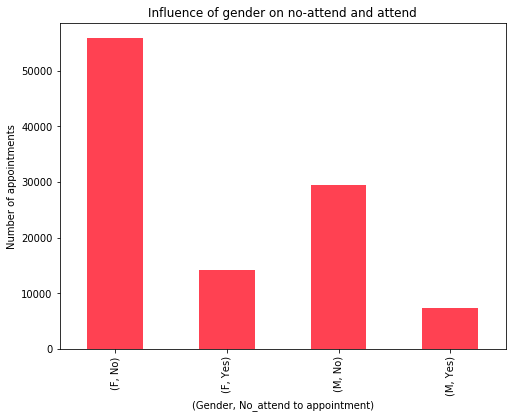

In [17]:
gender_data.plot(kind='bar',figsize=(8,6),color="#ff4152")
plt.title('Influence of gender on no-attend and attend')
plt.xlabel('(Gender, No_attend to appointment)')
plt.ylabel('Number of appointments')
plt.show();

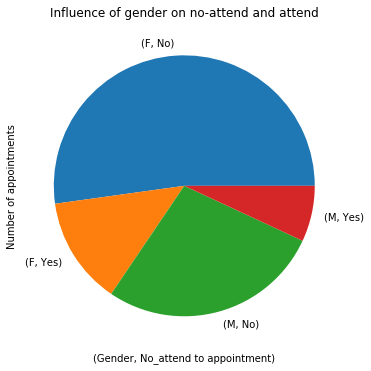

In [18]:
gender_data.plot(kind='pie',figsize=(8,6))
plt.title('Influence of gender on no-attend and attend')
plt.xlabel('(Gender, No_attend to appointment)')
plt.ylabel('Number of appointments')
plt.show();

- As we see that the high percent of attendence and the percent that controls all the data is about the females
- And if we noticed both percents of females and males are not different they are both close and correlated with there percent of show and no show

### Research Question 2 : Is there a relation between neighbourhood and non attendence?

In [ ]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.

implement a query of getting neighbourhoods with high no-attend

In [19]:
no_shows = df.query('No_attend == "Yes"').groupby('Neighbourhood').No_attend.count()
no_shows.sort_values(ascending=False, inplace=True)

Draw a graph to show results .

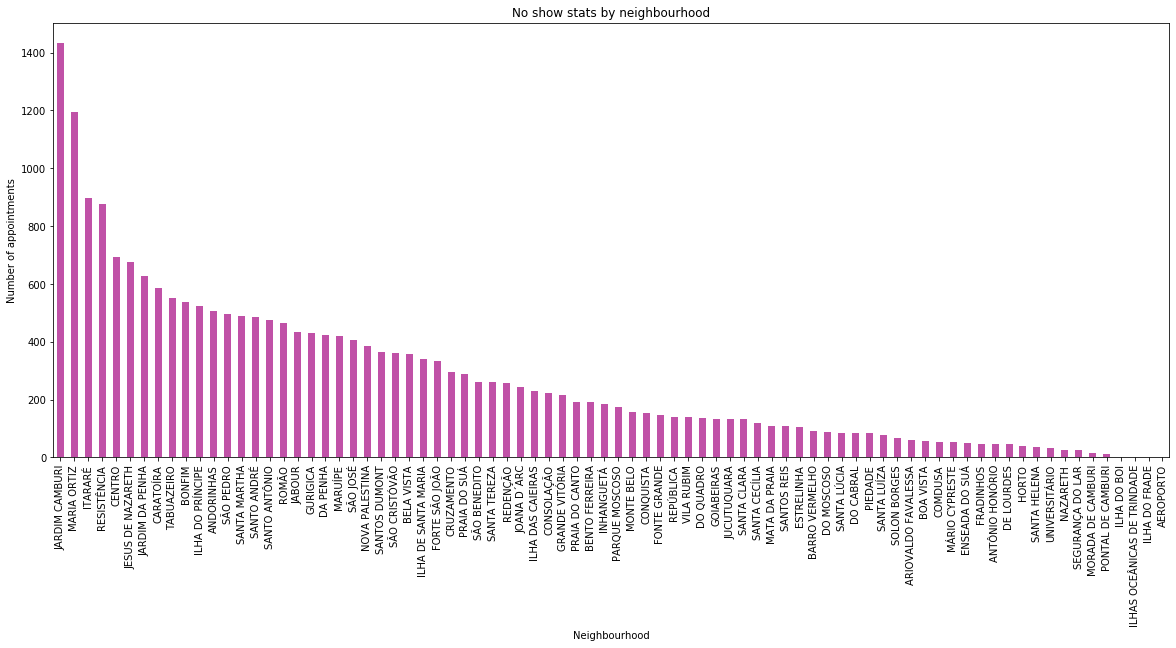

In [20]:
labels = no_shows.index
no_shows.plot(kind="bar", x=labels, figsize=(20,8), color="#C051A7")
plt.title("No show stats by neighbourhood")
plt.xlabel("Neighbourhood")
plt.ylabel("Number of appointments")
plt.show();

- Result
  
  we had saw that some neighbourhoods that had a hieghly no attendance number as the first four neighbourhoods in the graph   
  and the last four neighbourhoods had no signs of absence from the appointment 

## Limitations

> it will be good
- if there is a column of the distance between the patient and the hospital
- if we share the educational level of the patient
- if we share the salary level of the patient (heigh, low, medium)
- if there is the employment state of the patient
- there were some ununderstandable values of age = 0 but i had to delete them

<a id='conclusions'></a>
## Conclusions

> **Result 1**: There is no specific relation if the no attend related to any gender (male or female) and both the no attend percent for both genders are clothe to their attendence percent 

> **Result 2**: we found some neighbourhoods which has a high percent of non attendence and some other had a very low percent or non of no attend 